<a href="https://colab.research.google.com/github/safi50/Deep-Learning/blob/main/PyTorch_Non_Linear_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Non Linear Toy Dataset

In [22]:
from sklearn.datasets import make_circles

n_samples = 1000

X,Y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

print(len(X), len(Y))
print(X[:5], Y[:5])
print(type(X), type(Y))


1000 1000
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] [1 1 1 1 0]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Dataset Visualization

In [23]:
# making dataframe
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                       "label": Y})

circles[:10]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


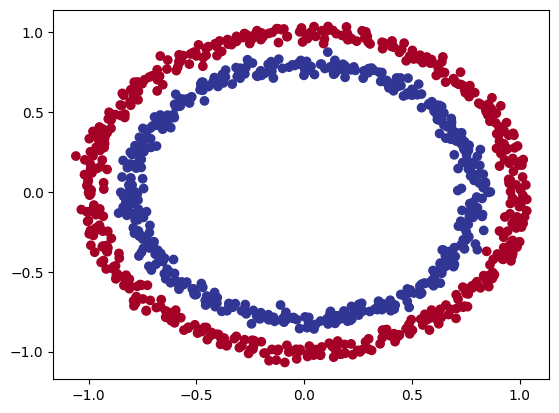

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y = X[: ,1],
            c=Y,
            cmap = plt.cm.RdYlBu);

### Converting Data from Numpy Array to Tensors and Splitting it (80-20)

In [25]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split

# Converting Data into Tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

## Device Agnostic Code:

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

## Non Linear Binary Classification Model

In [27]:
# 4 Linear Layers With ReLU Activation

model = nn.Sequential(
    nn.Linear(2,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,12),
    nn.ReLU(),
    nn.Linear(12,1)
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=12, bias=True)
  (5): ReLU()
  (6): Linear(in_features=12, out_features=1, bias=True)
)

## Loss Function , Optimizer and Accuracy Function

In [28]:
loss_fn = nn.BCEWithLogitsLoss() # Binary cross entropy with Logits Loss - (built in Sigmoid Function)
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.1)

In [29]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100

  return acc

## Training the Model

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 2500

X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test,Y_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
  model.train()

  # Forward Pass
  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))  # logits -> prediction probabilities -> prediction labels

  # Calculating the Loss
  loss = loss_fn(y_logits, Y_train) #BCEWithLogitsLoss calculates loss using logits)
  acc = accuracy_fn(y_true=Y_train,
                    y_pred= y_preds)

  #Optimzer zero grad
  optimizer.zero_grad()

  # back propagation
  loss.backward()

  # Optimzer Step
  optimizer.step()


  # Testing Loop
  model.eval()
  with torch.inference_mode():

    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , Y_test)
    test_acc = accuracy_fn(y_true = Y_test,
                           y_pred = test_preds)

    # Printing Results
    if epoch % 100 == 0:
      print(f" Epoch: {epoch} | Train Loss : {loss}  | Test Loss : {test_loss}")
      print(f"Train Accuracy: {acc:.2f} | Test Accuracy: {test_acc:.2f}")




 Epoch: 0 | Train Loss : 0.6968720555305481  | Test Loss : 0.6963967680931091
Train Accuracy: 50.00 | Test Accuracy: 50.00
 Epoch: 100 | Train Loss : 0.6921547055244446  | Test Loss : 0.691972017288208
Train Accuracy: 50.50 | Test Accuracy: 51.50
 Epoch: 200 | Train Loss : 0.6918013691902161  | Test Loss : 0.6914559602737427
Train Accuracy: 51.88 | Test Accuracy: 54.00
 Epoch: 300 | Train Loss : 0.6913785934448242  | Test Loss : 0.6908180117607117
Train Accuracy: 51.62 | Test Accuracy: 55.50
 Epoch: 400 | Train Loss : 0.6902864575386047  | Test Loss : 0.6893551349639893
Train Accuracy: 52.50 | Test Accuracy: 53.50
 Epoch: 500 | Train Loss : 0.6892408132553101  | Test Loss : 0.6881071329116821
Train Accuracy: 53.25 | Test Accuracy: 55.50
 Epoch: 600 | Train Loss : 0.6877405643463135  | Test Loss : 0.6863793730735779
Train Accuracy: 54.50 | Test Accuracy: 57.00
 Epoch: 700 | Train Loss : 0.6854251027107239  | Test Loss : 0.6839441061019897
Train Accuracy: 56.50 | Test Accuracy: 57.50
 Ep

##Decision Boundary Plot Helper Function

In [31]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


## Making Predictions

In [32]:
model.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model(X_test))).squeeze()
y_pred[:10] , Y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

### Visualizing Model Decision Boundary

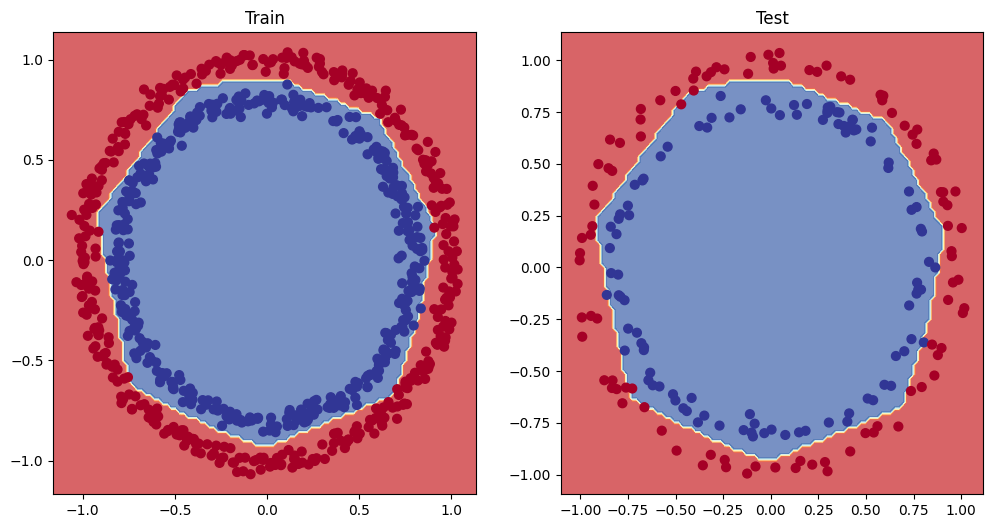

In [33]:
import numpy as np
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, Y_test)
